In [6]:
import pandas as pd

In [7]:
beer_df = pd.read_csv('../../data/beer.csv')

In [8]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


### Normalizing the features

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled_df = scaler.fit_transform(beer_df[['calories',
                                            'sodium',
                                            'alcohol',
                                            'cost']])

In [13]:
X_scaled_df

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn

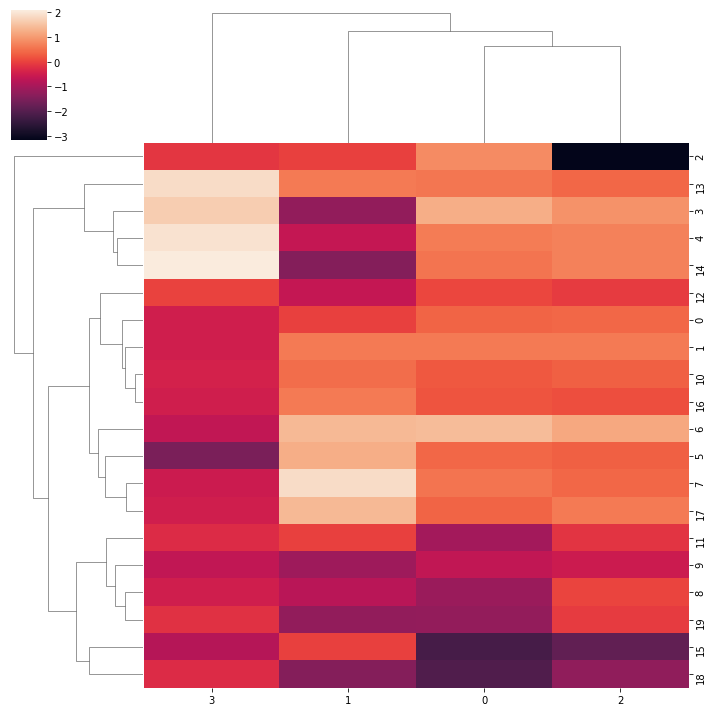

In [15]:
sn.clustermap(X_scaled_df);

### Creating clusters

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(6, random_state = 100)

In [18]:
kmeans.fit(X_scaled_df)

KMeans(n_clusters=6, random_state=100)

In [22]:
kmeans.labels_

array([0, 0, 4, 2, 2, 5, 5, 5, 3, 3, 0, 3, 3, 2, 2, 1, 0, 5, 1, 3],
      dtype=int32)

In [23]:
beer_df['cluster'] = kmeans.labels_

In [24]:
beer_df

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,4
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
5,Old_Milwaukee,145,23,4.6,0.28,5
6,Augsberger,175,24,5.5,0.40,5
7,Srohs_Bohemian_Style,149,27,4.7,0.42,5
8,Miller_Lite,99,10,4.3,0.43,3
9,Budweiser_Light,113,8,3.7,0.40,3


In [25]:
beer_df.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
14,Kirin,149,6,5.0,0.79,2
13,Becks,150,19,4.7,0.76,2


In [30]:
beer_df = beer_df.drop(2, axis = 0)

In [31]:
beer_df

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,4
1,Schlitz,151,19,4.9,0.43,4
3,Kronenbourg,170,7,5.2,0.73,3
4,Heineken,152,11,5.0,0.77,3
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
10,Coors,140,18,4.6,0.44,4
